<h1><center>Open University Learning Analytics dataset</center></h1>       
Data url: https://analyse.kmi.open.ac.uk/open_dataset    

                   

Open University Learning Analytics dataset contains data about student’s demographics, their interactions with the Virtual Learning Environment (Vle) and module information. There is information about seven modules in the dataset with course being presented twice a year denoted by ‘B’ and ‘J’ in the data suffix. The dataset also consists of scores and final results for all the students denoted by ‘Pass’, ‘Fail’, ‘Withdrawn’ and ‘Distinction’. There are 7 tables in the dataset connected using unique keys.

## Data preprocessing

In [1]:
### Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Read datasets
studentVle = pd.read_csv('studentVle.csv')
vle = pd.read_csv('vle.csv')
assess = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
studentAss = pd.read_csv('studentAssessment.csv')
studentInfo = pd.read_csv('studentInfo.csv')
studentReg = pd.read_csv('studentRegistration.csv')

In [3]:
### Replace '?' in data with nan
studentVle = studentVle.replace('?',np.nan)
vle = vle.replace('?',np.nan)
assess = assess.replace('?',np.nan)
courses = courses.replace('?',np.nan)
studentAss = studentAss.replace('?',np.nan)
studentInfo = studentInfo.replace('?',np.nan)
studentReg = studentReg.replace('?',np.nan)

In [4]:
#### Check which variables have missing values in each table
null_columns=studentVle.columns[studentVle.isnull().any()]
studentVle[null_columns].isnull().sum()

Series([], dtype: float64)

In [5]:
null_columns=vle.columns[vle.isnull().any()]
vle[null_columns].isnull().sum()

week_from    5243
week_to      5243
dtype: int64

In [6]:
null_columns=assess.columns[assess.isnull().any()]
assess[null_columns].isnull().sum()

date    11
dtype: int64

In [7]:
null_columns=courses.columns[courses.isnull().any()]
courses[null_columns].isnull().sum()

Series([], dtype: float64)

In [8]:
null_columns=studentAss.columns[studentAss.isnull().any()]
studentAss[null_columns].isnull().sum()

score    173
dtype: int64

In [9]:
null_columns=studentInfo.columns[studentInfo.isnull().any()]
studentInfo[null_columns].isnull().sum()

imd_band    1111
dtype: int64

In [10]:
null_columns=studentReg.columns[studentReg.isnull().any()]
studentReg[null_columns].isnull().sum()

date_registration         45
date_unregistration    22521
dtype: int64

#### The missing values obtained in each table can be imputed after exploring the data

## Exploratory Data Analysis

Since studentInfo table consists of student's final_results across various demographics, to understand relationship between the two variables, some basic graphs were plotted

### How does final result vary across student demographics?

Here, percentage of students for each variable type are calculated instead of absolute value to account for class imbalance in each variable

##### Final result percentage for different code modules

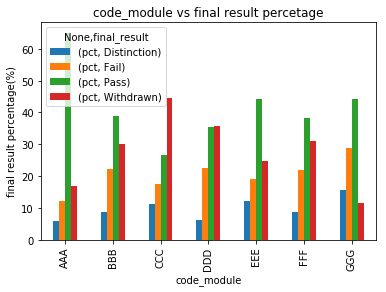

In [11]:
total = studentInfo.groupby(['code_module'],as_index = False)[['id_student']].count()
count = studentInfo.groupby(['code_module','final_result'],as_index = False)[['id_student']].count()
code_module_pct = pd.merge(count,total,on = 'code_module',how = 'left')
code_module_pct['pct'] = round((code_module_pct['id_student_x']/code_module_pct['id_student_y'])*100,2)
code_module_pct = code_module_pct[['code_module','final_result','pct']]
code_module_pct.set_index(['code_module','final_result']).unstack().plot(kind = 'bar')
plt.ylabel('final result percentage(%)')
plt.title('code_module vs final result percetage')
plt.show()

The final result_percentage is dependent on code_module. CCC has the highest withdrawal rate while AAA has highest pass rate.   
The fail percente does not vary much across modules. 

##### Final result percentage for code presentations

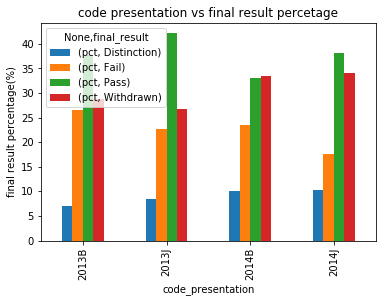

In [12]:
total = studentInfo.groupby(['code_presentation'],as_index = False)[['id_student']].count()
count = studentInfo.groupby(['code_presentation','final_result'],as_index = False)[['id_student']].count()
code_pres_pct = pd.merge(count,total,on = 'code_presentation',how = 'left')
code_pres_pct['pct'] = round((code_pres_pct['id_student_x']/code_pres_pct['id_student_y'])*100,2)
code_pres_pct = code_pres_pct[['code_presentation','final_result','pct']]
code_pres_pct.set_index(['code_presentation','final_result']).unstack().plot(kind = 'bar')
plt.ylabel('final result percentage(%)')
plt.title('code presentation vs final result percetage')
plt.show()

The final pass percentage has fallen over time from 2013 -2014. Although the fall is not gradual as students have higher pass percent in modules offered in J session when compared to modules offered in B session

##### Final result percentage across genders

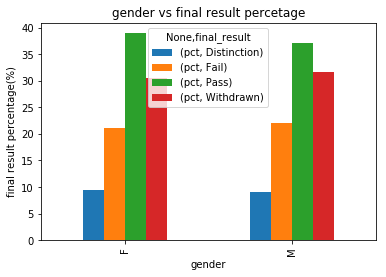

In [13]:
total = studentInfo.groupby(['gender'],as_index = False)[['id_student']].count()
count = studentInfo.groupby(['gender','final_result'],as_index = False)[['id_student']].count()
gender_pres_pct = pd.merge(count,total,on = 'gender',how = 'left')
gender_pres_pct['pct'] = round((gender_pres_pct['id_student_x']/gender_pres_pct['id_student_y'])*100,2)
gender_pres_pct = gender_pres_pct[['gender','final_result','pct']]
gender_pres_pct.set_index(['gender','final_result']).unstack().plot(kind = 'bar')
plt.ylabel('final result percentage(%)')
plt.title('gender vs final result percetage')
plt.show()

All the final result percentages are mostly constant across gender. Gender does not effect final results

##### Final result percentage for different regions

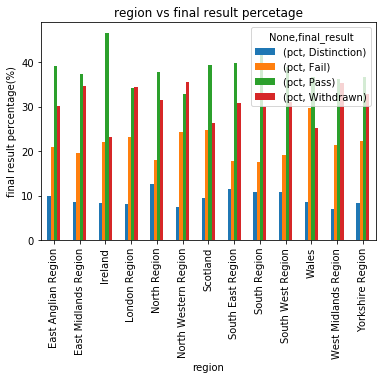

In [14]:
total = studentInfo.groupby(['region'],as_index = False)[['id_student']].count()
count = studentInfo.groupby(['region','final_result'],as_index = False)[['id_student']].count()
code_pres_pct = pd.merge(count,total,on = 'region',how = 'left')
code_pres_pct['pct'] = round((code_pres_pct['id_student_x']/code_pres_pct['id_student_y'])*100,2)
code_pres_pct = code_pres_pct[['region','final_result','pct']]
code_pres_pct.set_index(['region','final_result']).unstack().plot(kind = 'bar')
plt.ylabel('final result percentage(%)')
plt.title('region vs final result percetage')
plt.show()

Students from Ireland have the highest pass percentage while students from London, East midlands have withdrawal percentage same as pass percentage.  
Although, there is no significant disparity in result percentages across regions.

##### Final result percentage for different qualifications

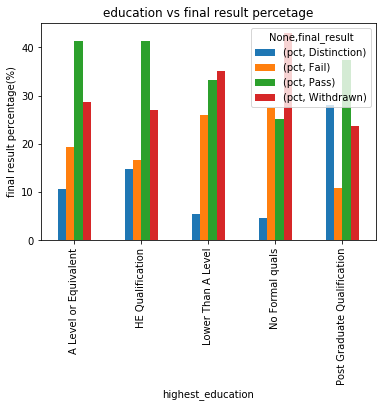

In [15]:
total = studentInfo.groupby(['highest_education'],as_index = False)[['id_student']].count()
count = studentInfo.groupby(['highest_education','final_result'],as_index = False)[['id_student']].count()
edu_pct = pd.merge(count,total,on = 'highest_education',how = 'left')
edu_pct['pct'] = round((edu_pct['id_student_x']/edu_pct['id_student_y'])*100,2)
edu_pct = edu_pct[['highest_education','final_result','pct']]
edu_pct.set_index(['highest_education','final_result']).unstack().plot(kind = 'bar')
plt.ylabel('final result percentage(%)')
plt.title('education vs final result percetage')
plt.show()

Student with no formal qualification or qualification lower than A level have highest withdrawal rates as expected. This could be due to them not having enough knowledge to cope up with the course.
Also, students with much higher education levels have higher pass percentage. Although, students with HE Qualification or A level or equivalent have higher pass percentage when compared to students with post graduate qualification. Though, students with post graduate qualification have much lower failure rates


##### Final result percentage for different age bands

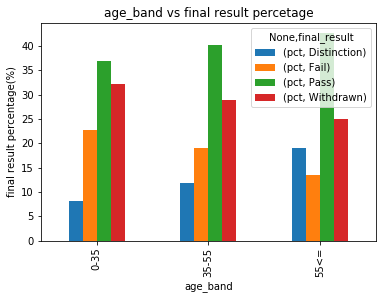

In [16]:
total = studentInfo.groupby(['age_band'],as_index = False)[['id_student']].count()
count = studentInfo.groupby(['age_band','final_result'],as_index = False)[['id_student']].count()
age_pct = pd.merge(count,total,on = 'age_band',how = 'left')
age_pct['pct'] = round((age_pct['id_student_x']/age_pct['id_student_y'])*100,2)
age_pct = age_pct[['age_band','final_result','pct']]
age_pct.set_index(['age_band','final_result']).unstack().plot(kind = 'bar')
plt.ylabel('final result percentage(%)')
plt.title('age_band vs final result percetage')
plt.show()

The pass percentage keeps increasing with increasing age band and withdrawal and failure percent keeps falling with age band

##### Final result percentage for different imd_bands

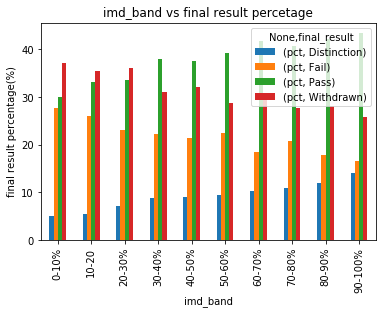

In [17]:
total = studentInfo.groupby(['imd_band'],as_index = False)[['id_student']].count()
count = studentInfo.groupby(['imd_band','final_result'],as_index = False)[['id_student']].count()
imd_pct = pd.merge(count,total,on = 'imd_band',how = 'left')
imd_pct['pct'] = round((imd_pct['id_student_x']/imd_pct['id_student_y'])*100,2)
imd_pct = imd_pct[['imd_band','final_result','pct']]
imd_pct.set_index(['imd_band','final_result']).unstack().plot(kind = 'bar')
plt.ylabel('final result percentage(%)')
plt.title('imd_band vs final result percetage')
plt.show()

The index of Multiple Deprivation (imd_band) is determined by the location of student from which he/she is attempting the module. It is determined from qualitative study of deprived areas. There is a clear pattern observed in withdrawal percentage and pass percentage observed here. As imd_band increases, pass percentage increases and withdrawal rate falls down.

##### Final result percentage for disability groups

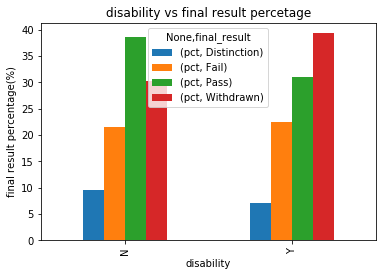

In [18]:
total = studentInfo.groupby(['disability'],as_index = False)[['id_student']].count()
count = studentInfo.groupby(['disability','final_result'],as_index = False)[['id_student']].count()
dis_pct = pd.merge(count,total,on = 'disability',how = 'left')
dis_pct['pct'] = round((dis_pct['id_student_x']/dis_pct['id_student_y'])*100,2)
dis_pct = dis_pct[['disability','final_result','pct']]
dis_pct.set_index(['disability','final_result']).unstack().plot(kind = 'bar')
plt.ylabel('final result percentage(%)')
plt.title('disability vs final result percetage')
plt.show()

Student disability is a driving factor to determine final result percentages. Students with disability have much higher withdrawal rates and lower pass percentages.

### How does click activity vary across different modules and presentations for students who unregistered from the course vs those who completed the course?

In [19]:
### Creating seperate datasets for students who unregistered from course and those who completed it
studentunreg = studentReg[pd.isnull(studentReg['date_unregistration']) != True]
studentreg = studentReg[pd.isnull(studentReg['date_unregistration']) == True]
### summing student clicks for code module, presentation across various dates
studentclick = studentVle.groupby(['code_module','code_presentation','id_student','date'],as_index = False)[['sum_click']].sum()

In [20]:
### Obtaining student clicks for every student id
studentunreg = pd.merge(studentunreg,studentclick, on = ['code_module', 'code_presentation', 'id_student'], how = 'left')
studentreg = pd.merge(studentreg,studentclick, on = ['code_module', 'code_presentation', 'id_student'], how = 'left')

##### Student interactions across dates and code modules for students who unregistered from the course

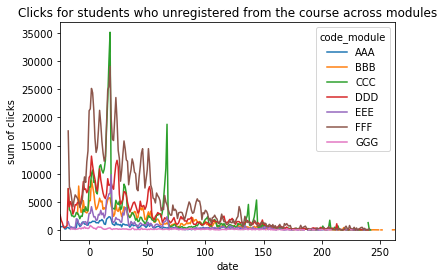

In [21]:
### Summing clicks for code_modules and dates
studentunregmod = studentunreg.groupby(["code_module",'date'],as_index = False)[['sum_click']].sum()
pivoted = pd.pivot_table(studentunregmod, values='sum_click', columns='code_module', index='date')
pivoted.plot()
plt.ylabel('sum of clicks')
plt.title('Clicks for students who unregistered from the course across modules')
plt.show()

For students who unregistered, student interactions fall sharply after 50 days. For modules CCC and EEE, the effect is more drastic as they have high clicks till day 20. It was observed in the above analysis that CCC also has the highest withdrawal rate. This could reflect the quality of module CCC, it can be either be too complex, not engaging enough or poor quality of instructors

##### Student interactions across dates and code modules for students who completed the course

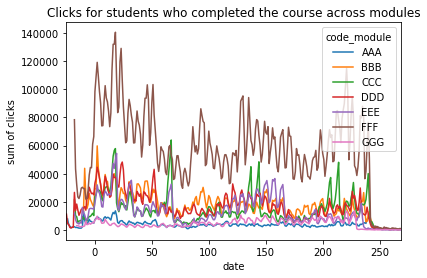

In [22]:
studentregmod = studentreg.groupby(["code_module",'date'],as_index = False)[['sum_click']].sum()
pivoted = pd.pivot_table(studentregmod, values='sum_click', columns='code_module', index='date')
pivoted.plot()
plt.ylabel('sum of clicks')
plt.title('Clicks for students who completed the course across modules')
plt.show()

Student engagement follows a fluctuating trend in case of students who completed the couorse and there is no observed sharp dip. Here, module FFF has highest student engagement

##### Student interactions across dates and code presentations for students who unregistered form the course

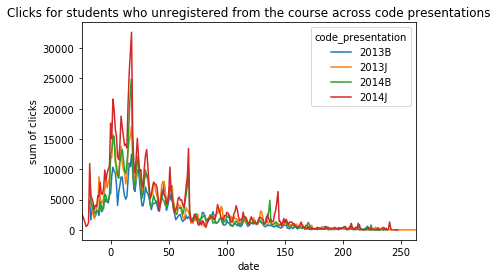

In [23]:
studentunregpres = studentunreg.groupby(["code_presentation",'date'],as_index = False)[['sum_click']].sum()
pivoted = pd.pivot_table(studentunregpres, values='sum_click', columns='code_presentation', index='date')
pivoted.plot()
plt.ylabel('sum of clicks')
plt.title('Clicks for students who unregistered from the course across code presentations')
plt.show()

In case of code presentations, presentations 2014J and 2013J have the highest number of clicks. These fall off after day20 too as observed above. It was observed during exploration that modules offered in J session have lower withdrawal rates as compared to modules offered in B session. Hence, there is a direct relation between student engagement and withdrawal rate. Also, modules in J session engage students better.

##### Student interactions across dates and code presentations for students who completed the course

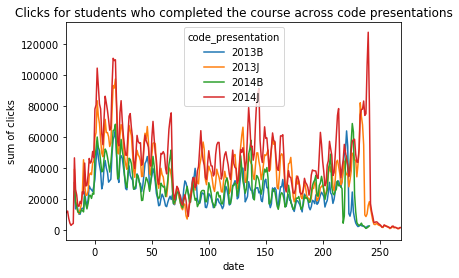

In [24]:
studentregpres = studentreg.groupby(["code_presentation",'date'],as_index = False)[['sum_click']].sum()
pivoted = pd.pivot_table(studentregpres, values='sum_click', columns='code_presentation', index='date')
pivoted.plot()
plt.ylabel('sum of clicks')
plt.title('Clicks for students who completed the course across code presentations')
plt.show()

There is a fluctuating trend observed across code presentations for students who completed the course. Student engagement needs to be consistent over time for success in a particular module or presentation

### How do scores vary across different assessment types for students who unregistered from the course vs students who completed the course?

In [25]:
### Obtaining mean of student scores for different assessment types for students who completed the course
studentreg1 = studentreg['id_student'].unique()
studentreg1 = studentAss[studentAss['id_student'].isin(studentreg1)]
studentreg1['score'] = pd.to_numeric(studentreg1['score'])
studentreg1 = studentreg1.groupby('id_assessment',as_index = False)[['score']].mean()

C:\Users\Charvi mittal\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
### Obtaining mean of student scores for different assessment types for students who unregistered from the course
studentunreg1 = studentunreg['id_student'].unique()
studentunreg1 = studentAss[studentAss['id_student'].isin(studentunreg1)]
studentunreg1['score'] = pd.to_numeric(studentunreg1['score'])
studentunreg1 = studentunreg1.groupby('id_assessment',as_index = False)[['score']].mean()

C:\Users\Charvi mittal\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
### Merge to get assessment type for each assessment id
assessType = assess[['assessment_type','id_assessment']].drop_duplicates()
assessScorereg = pd.merge(assessType, studentreg1, on = 'id_assessment')
assessScoreunreg = pd.merge(assessType, studentunreg1, on = 'id_assessment')

##### Student score distributions for students who unregistered from the course across different assessment types

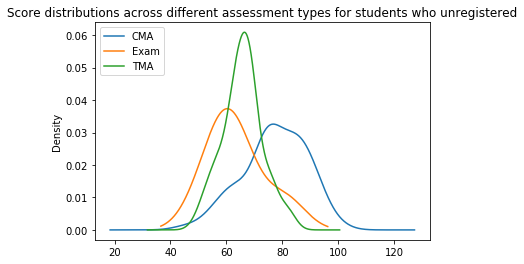

In [28]:
assessScoreunreg.groupby('assessment_type').score.plot(kind='kde')
plt.legend(loc='upper left')
plt.title('Score distributions across different assessment types for students who unregistered')
plt.show()

Students who unregister from course have lowest marks in Exams followed by TMA and then highest in CMA. Most students get a score of around 65 in TMA while CMA has more widespread distribution ranging from 40 till 100

##### Student score distributions for students who completed the course across different assessment types

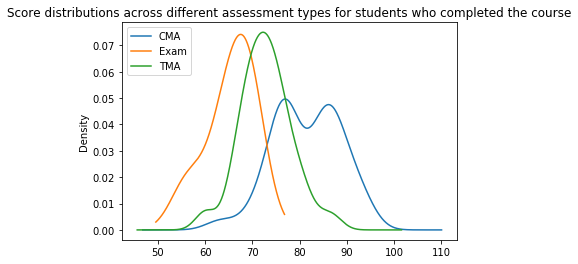

In [29]:
assessScorereg.groupby('assessment_type').score.plot(kind='kde')
plt.legend(loc='upper left')
plt.title('Score distributions across different assessment types for students who completed the course')
plt.show()

Students who completed the course have marks centered around 65 and 70 for Exams and TMA respectively. Even here, students performs worst on Exams and have best performances in CMA. Although CMA has a widespread distribution with values from 60 till 100. There are 2 peaks observed in CMA distribution which shows there are 2 segments of students within this segment, i.e., students who get marks of around 75 and students who score 90

#### As part of Exploratory Data Analysis, relationships were found between student demographics and final result percentages to see how demographics effect students behavior. Also, percentages were looked at across modules and presentations to see if there are any modules in which the students are spefically not performing well. This information is value adding for stakeholders as they would be able to identify low quality modules.  
#### Student engagement was also looked at for students who completed the courses vs who unregistered across modules and presentations. This helps determine relation between final student results and student engagement. Also, it helps figure out modules in which student interaction is low and helps support module quality hypothesis obtained in above analysis.
#### Finally, score distributions of students was determined across various assessment types to see how scores vary for different segment of students

## Data imputations

In [34]:
### Missing student score values have been imputed by mean of scores for each student 
studentAss['score'] = studentAss['score'].astype(float)
studentAss['score']  = studentAss.groupby('id_student')['score'].transform(lambda x: x.fillna(x.mean()))
### Check if missing values have been imputed by score means
null_columns=studentAss.columns[studentAss.isnull().any()]
studentAss[null_columns].isnull().sum()

score    19
dtype: int64

In [35]:
### Certain values are still missing
### There is no score available for these students
### We can impute it with 0
studentAss['score'].fillna(0,inplace = True)

In [36]:
### For imd_band after exploring the data, it was observed missing values have higher pass percentage
### Hence imd_band for missing values must be higher, hence imputing it with average of higher band values, i.e., 60-70%
studentInfo['imd_band'].fillna('60-70%',inplace = True)

## MasterTable creation

#### Merge table for master dataset creation

In [101]:
mainTable = pd.merge(studentAss,assess, on = ['id_assessment'], how = 'left')

In [102]:
mainTable = pd.merge(studentInfo,
                 mainTable,
                 on=['code_module', 'code_presentation','id_student'], 
                 how='inner')

In [39]:
mainTable = pd.merge(mainTable,
                 courses,
                 on=['code_module', 'code_presentation'], 
                 how='left')

In [40]:
## Summing up clicks across all dates
## since clicks across dates have been analyzed in the analysis above, removing this would make data smaller 
## and computationaly faster to run models on

In [41]:
studentclick = studentclick.groupby(['code_module', 'code_presentation','id_student'],as_index = False)[['sum_click']].sum()

In [42]:
mainTable = pd.merge(mainTable,
                 studentclick,
                 on=['code_module', 'code_presentation','id_student'], 
                 how='left')

In [43]:
## Check for class imbalance in the master data
mainTable['final_result'].value_counts()

Pass           106021
Fail            28466
Distinction     26330
Withdrawn       13095
Name: final_result, dtype: int64

*Pass percentage forms major chunk of data. This problem would be dealt with later while building predictive model*

In [44]:
### Changing data types of columns
mainTable['id_assessment'] = mainTable['id_assessment'].astype(str)
mainTable['is_banked'] = mainTable['is_banked'].astype(str)
mainTable['date'] = mainTable['date'].astype(float)

In [45]:
## Removing student id as those students can be uniquely identified by other columns
mainTablemod = mainTable.drop('id_student',axis =1)

In [46]:
## Check for missing values
null_columns=mainTablemod.columns[mainTablemod.isnull().any()]
mainTablemod[null_columns].isnull().sum()

date         2865
sum_click     168
dtype: int64

In [47]:
mainTablemod.shape
### Since there are not many missing values, we can impute them by mode of the column

(173912, 20)

In [48]:
### Imputing sum of clicks and date with mode of the variable
mainTablemod['sum_click'].fillna(mainTablemod['sum_click'].mode()[0],inplace = True)
mainTablemod['date'].fillna(mainTablemod['date'].mode()[0],inplace = True)

#### Dummy variable creation

In [50]:
mainTabledum = pd.get_dummies(mainTablemod)

In [51]:
mainTabledum.shape

(173912, 251)

In [52]:
null_columns=mainTabledum.columns[mainTabledum.isnull().any()]
mainTabledum[null_columns].isnull().sum()

Series([], dtype: float64)

#### Since data has large feature space, tree based methods can be employed to see which features are relevant to determine the final result percentage

## Feature selection

#### DecisionTree has been employed in this case for feature selection as it can deal with imbalanced classes.  
#### The important features obtained from Decision Tree can be combined with features obtained from exploratory analysis to build a predictive model 


In [53]:
### Build decision tree classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=1234)
X = mainTabledum.drop(['final_result_Distinction', 'final_result_Fail','final_result_Pass', 'final_result_Withdrawn'],axis = 1)
y =  mainTabledum[['final_result_Distinction', 'final_result_Fail','final_result_Pass', 'final_result_Withdrawn']]
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1234, splitter='best')

In [57]:
print("Features sorted by their rank:")
imp_feat = sorted(zip(map(lambda i: round(i, 4), clf.feature_importances_), X),reverse = True)
df = pd.DataFrame(imp_feat)
df.columns = ['rank','feature']
df.iloc[0:51]

Features sorted by their rank:


,rank,feature
0,0.2339,sum_click
1,0.1009,score
2,0.0736,date_submitted
3,0.0398,studied_credits
4,0.0187,date
5,0.0185,module_presentation_length
6,0.0155,weight
7,0.0153,num_of_prev_attempts
8,0.0137,imd_band_60-70%
9,0.0134,imd_band_20-30%


The most important features which influence final percent as obtained from exploratory analysis were code_module, code_presentation, disability, regions, previous formal education, age, imd_band, sum_clicks, scores and assessment type.  
Although almost similar features were obtained from Decision Tree Classifier, there were certain features which showed higher importance such as date_submitted, studied credits, module presentation length and number of previous attempts.

In [58]:
### Subsetting dataframe to have most important features
featlist = df.iloc[0:51]['feature']
df_new = mainTabledum[featlist]
df_new['final_result'] = mainTable['final_result']

C:\Users\Charvi mittal\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Model building

### A multi-class classification model with features obtained above can help instructors identify students with a higher probability of withdrawing or failing the course

#### A logistic regression classifier is fit on the training dataset and predictions are made on test dataset to check accuracy of the classifier

In [60]:
### Input-output matrices defined
### Train-test split in ratio of 70:30
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
X = df_new.drop('final_result',axis = 1)
y = df_new['final_result']
train_x, test_x, train_y, test_y = train_test_split(X,y,train_size = 0.7)

C:\Users\Charvi mittal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [61]:
### Logistic Regression classifier fit on training data
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train_x, train_y)
pred_train = mul_lr.predict(train_x)
pred_test = mul_lr.predict(test_x)
print("Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, pred_train))
print("Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y,pred_test))

C:\Users\Charvi mittal\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Logistic regression Train Accuracy ::  0.644449555603
Logistic regression Test Accuracy ::  0.647755587074


In [62]:
### Since train and test accuracy is almost same, model does not overfit

#### In classification problems, a confusion matrix is used as an evaluation criteria as it helps calculate true positive rate, precision which can help identify misclassification rate 

In [64]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(test_y, pred_test, labels = ['Distinction','Fail','Pass', 'Withdrawn']),
    columns = ['Predicted Distinction','Predicted Fail','Predicted Pass','Predicted Withdrawn'],
    index = ['True Distinction','True Fail','True Pass','True Withdrawn']
)

,Predicted Distinction,Predicted Fail,Predicted Pass,Predicted Withdrawn
True Distinction,1276,30,6481,17
True Fail,40,1585,6227,700
True Pass,826,854,29990,247
True Withdrawn,23,782,2151,945


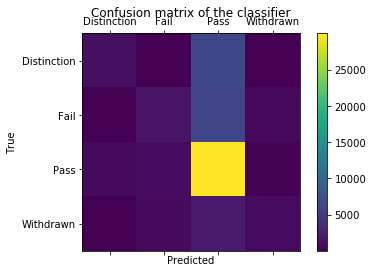

In [65]:
### Plotting confusion matrix
fig = plt.figure()
ax = fig.add_subplot(111)
labels = ['Distinction','Fail','Pass', 'Withdrawn']
cm = confusion_matrix(test_y, pred_test, labels = labels)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [66]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_test))

             precision    recall  f1-score   support

Distinction       0.59      0.16      0.26      7804
       Fail       0.49      0.19      0.27      8552
       Pass       0.67      0.94      0.78     31917
  Withdrawn       0.50      0.24      0.33      3901

avg / total       0.61      0.65      0.58     52174



#### In this case recall is low for withdrawn and fail students which is a concern. A lot of Withdrawn and Fail students are getting classified as Pass which could be due to huge class imbalance observed earlier.   
#### Hence, the data is downsampled so that class sizes are approximately same.

### Logistic regression on downsampled data

In [67]:
df_new['final_result'].value_counts()

Pass           106021
Fail            28466
Distinction     26330
Withdrawn       13095
Name: final_result, dtype: int64

In [68]:
### Data downsampling
from sklearn.utils import resample
# Separate majority and minority classes
df_fail= df_new[df_new.final_result=='Fail']
df_pass = df_new[df_new.final_result=='Pass']
df_withdraw =  df_new[df_new.final_result=='Withdrawn']
df_distinction = df_new[df_new.final_result=='Distinction']

# Downsample majority class
df_pass_downsampled = resample(df_pass, 
                                 replace=False,    # sample without replacement
                                 n_samples=30000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_pass_downsampled, df_fail,df_withdraw,df_distinction])
 
# Display new class counts
df_downsampled.final_result.value_counts()

Pass           30000
Fail           28466
Distinction    26330
Withdrawn      13095
Name: final_result, dtype: int64

In [69]:
Xdown = df_downsampled.drop('final_result',axis = 1)
ydown = df_downsampled['final_result']
trainx, testx, trainy, testy = train_test_split(Xdown,ydown,train_size = 0.7)
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(trainx, trainy)
### Fitting classifier on original test data population
pred_test = mul_lr.predict(test_x)
print("Logistic regression Test Accuracy on the original dataset :: ", metrics.accuracy_score(test_y,pred_test))

C:\Users\Charvi mittal\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Logistic regression Test Accuracy on the original dataset ::  0.500479165868


In [70]:
#### Confusion matrix
pd.DataFrame(
    confusion_matrix(test_y, pred_test, labels = ['Distinction','Fail','Pass', 'Withdrawn']),
    columns = ['Predicted Distinction','Predicted Fail','Predicted Pass','Predicted Withdrawn'],
    index = ['True Distinction','True Fail','True Pass','True Withdrawn']
)

,Predicted Distinction,Predicted Fail,Predicted Pass,Predicted Withdrawn
True Distinction,5325,460,1927,92
True Fail,699,5187,1765,901
True Pass,8458,8211,14431,817
True Withdrawn,328,1977,427,1169


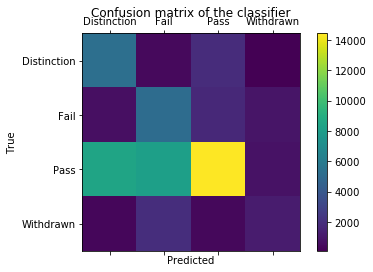

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
labels = ['Distinction','Fail','Pass', 'Withdrawn']
cm = confusion_matrix(test_y, pred_test, labels = labels)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [72]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_test))

             precision    recall  f1-score   support

Distinction       0.36      0.68      0.47      7804
       Fail       0.33      0.61      0.43      8552
       Pass       0.78      0.45      0.57     31917
  Withdrawn       0.39      0.30      0.34      3901

avg / total       0.61      0.50      0.52     52174



#### Logistic Regression on downsampled data increases recall significantly and gives better classifications

### Random Forest

#### Random Forest classifier is employed to see if recall can be further improved. Tree based methods perform well on imbalanced classes

In [73]:
### Test-train split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
train_x, test_x, train_y, test_y = train_test_split(X,y,train_size = 0.7)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [74]:
### Test data predictions
from sklearn.metrics import accuracy_score
predict = rf.predict(test_x)
print(accuracy_score(test_y, predict))

0.775788707019


In [75]:
pd.DataFrame(
    confusion_matrix(test_y, predict, labels = ['Distinction','Fail','Pass', 'Withdrawn']),
    columns = ['Predicted Distinction','Predicted Fail','Predicted Pass','Predicted Withdrawn'],
    index = ['True Distinction','True Fail','True Pass','True Withdrawn']
)

,Predicted Distinction,Predicted Fail,Predicted Pass,Predicted Withdrawn
True Distinction,5229,93,2712,25
True Fail,130,4958,2997,492
True Pass,1190,1199,28932,223
True Withdrawn,71,1032,1534,1357


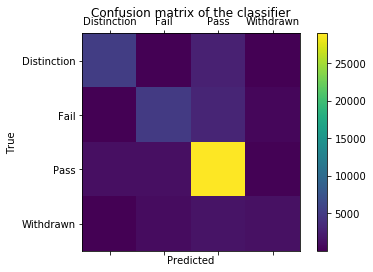

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)
labels = ['Distinction','Fail','Pass', 'Withdrawn']
cm = confusion_matrix(test_y, predict, labels = labels)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [77]:
print(classification_report(test_y, predict))

             precision    recall  f1-score   support

Distinction       0.79      0.65      0.71      8059
       Fail       0.68      0.58      0.63      8577
       Pass       0.80      0.92      0.85     31544
  Withdrawn       0.65      0.34      0.45      3994

avg / total       0.77      0.78      0.76     52174



### Although Random forests classify well when compared with original Logistic Regression model with an increase in recall for Pass and Withdraw, Logistic regression on downsampled data is the best classifier. It classifies Fail students correctly and in case of Withdrawn, it identifies students as mostly Fail or Withdrawn. This misclassification is better than being misclassified as Pass which is a major concern.

## What if student withdrawal rates are higher due to module quality being low and not historical student performance metrics?

### This information is valuable for stakeholders as it can help them differentiate between highly engaging modules and modules with low student activity. This can help them invest and plan modules accordingly.

In [78]:
## Some of the most important variables in this analysis are score and student interactions through sum_clicks. 
## We have looked at model from student's perspective
## What if a particular course is not performing well?
## What if the failure rate is higher for one particular course?

In [79]:
## Performance of different modules is tracked over time with respect to student clicks, scores and withdrawal rates

##### Student clicks across modules for different code presentations

In [94]:
interactions = mainTable.groupby(['code_module','code_presentation'],as_index=False)[['sum_click']].mean()
pivoted = pd.pivot_table(interactions, values='sum_click', columns='code_module', index='code_presentation')
pivoted

code_module,AAA,BBB,CCC,DDD,EEE,FFF,GGG
code_presentation,,,,,,,
2013B,NaN,1144.837036,NaN,1599.390755,NaN,3772.330463,NaN
2013J,1877.029394,958.133692,NaN,1369.750158,1997.871706,3435.729031,697.854356
2014B,NaN,820.386188,1749.138470,1217.173166,1739.891573,3128.785504,713.210784
2014J,1859.928760,1074.852313,1769.414758,1151.679830,1894.061104,3611.232939,733.134690


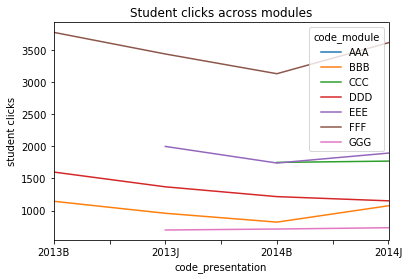

In [95]:
pivoted.plot()
plt.ylabel('student clicks')
plt.title('Student clicks across modules')
plt.show()

Student engagement is higher during 'J' code presentation as observed earlier during data exploration. CCC module which was offered just in 2014 has higher student engagement for both module presentations. Modules like DDD have consistently falling student clicks.

##### Student scores across modules for different code presentations

In [92]:
scores = mainTable.groupby(['code_module','code_presentation'],as_index=False)[['score']].mean()
pivoted = pd.pivot_table(scores, values='score', columns='code_module', index='code_presentation')
pivoted

code_module,AAA,BBB,CCC,DDD,EEE,FFF,GGG
code_presentation,,,,,,,
2013B,NaN,79.055621,NaN,69.660836,NaN,77.956061,NaN
2013J,69.421617,78.910743,NaN,69.578873,80.604022,77.120564,80.250756
2014B,NaN,78.945431,70.911407,69.287841,79.732022,76.676462,79.568355
2014J,68.572559,65.715463,74.787694,71.497075,82.432848,78.712569,79.047793


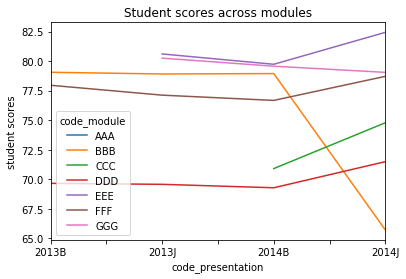

In [93]:
pivoted.plot()
plt.ylabel('student scores')
plt.title('Student scores across modules')
plt.show()

Mean student score has taken a huge hit for BBB module in 2014J whereas scores for all other modules have increased. Although DDD has lower student engagement, mean scores are not affected. 

##### Student withdrawal rate across modules for different code presentations

In [96]:
total = mainTable.groupby(['code_module','code_presentation'],as_index=False)[['final_result']].count()
withdraw = mainTable[mainTable['final_result'] == 'Withdrawn'].groupby(['code_module','code_presentation'],as_index = False)[['final_result']].count()
withdraw = pd.merge(total,withdraw,on = ['code_module','code_presentation'],how = 'inner')
withdraw['withdrawal_rate'] = (withdraw['final_result_y']/withdraw['final_result_x'])*100
pivoted = pd.pivot_table(withdraw, values='withdrawal_rate', columns='code_module', index='code_presentation')
pivoted

code_module,AAA,BBB,CCC,DDD,EEE,FFF,GGG
code_presentation,,,,,,,
2013B,NaN,7.249467,NaN,11.433529,NaN,5.395654,NaN
2013J,6.001225,5.043478,NaN,10.597278,5.131761,6.459360,1.462185
2014B,NaN,5.363755,14.087328,13.826508,5.730337,6.953707,2.267157
2014J,8.047493,8.274838,12.968300,11.044553,5.295757,6.117153,1.829408


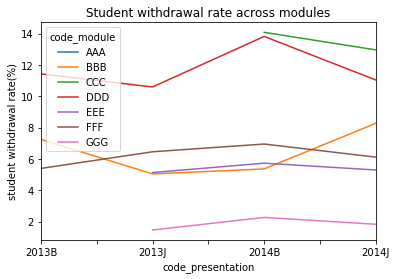

In [97]:
pivoted.plot()
plt.ylabel('student withdrawal rate(%)')
plt.title('Student withdrawal rate across modules')
plt.show()

As student scores have dipped significantly for module BBB, withdrawal rate has increased for the same. Withdrawal rate is highest for modules presented in sssion B over session J. DDD has been performing well in terms of student scores and withdrawal rate although student engagement has fallen down for the same. 

#### Module BBB is performing worst among all modules with among the lowest engagement, decreasing scores and increasing withdrawal rate.   
#### Module CCC although having among highest withdrawal rate is improving steadily in terms of engagement, scores and withdrawals  
#### Module GGG performs quite differently as it has lowest withdrawal rate and highest scores with lowest student engagement. This could be attributed to the fact that GGG has less engaging material of subpar quality